Universidad del valle de Guatemala  
Dpto. Ciencias de la computacion  
Inteligencia Artificial  
Alberto Suriano  

Laboratorio 4  
Andres Quinto - 18288  
Marlon Hernández - 15177

- Link del repositorio: https://github.com/AndresQuinto5/IA_LAB4.git

# Task 1 - Preguntas Teóricas

1. Explique con sus propias palabras, qué son los grafos computaciones y cuál es su importancia para el
cálculo de gradientes en aplicaciones como backpropagation
2. Detalle cuales son los componentes y pasos que conforman una red neuronal. Con esto en mente, ¿cómo
mejoraría el perceptrón que hizo en el laboratorio pasado?
3. Investigue y explique cómo se selecciona el valor K usando el método de la silueta para el algoritmo de
K-Means. Explique las fórmulas (ecuaciones) que lo componen así como las asumpciones, si hay.
4. Investigue sobre Principal Component Analysis (PCA) y responda respecto a algoritmos como K-Means:
a. ¿Cómo podría ayudarle a mejorar la calidad de sus clusters cuando se usa K-Means?

# Task 2 - Ejercicios Prácticos

Task 2.1 - K-Means y Segmentación de Clientes de Banco

## Analisis exploratorio

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

df = pd.read_csv('bank_transactions.csv')
df

C:\Users\aeqv2\AppData\Local\Temp\ipykernel_1272\2965881037.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0


In [2]:
df.dropna(inplace=True)
df

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0


In [3]:
df['CustGender'].unique()

array(['F', 'M', 'T'], dtype=object)

Nota: por alguna razon hay un valor T, en la columna de generos, aun siendo mas extraño de que solo haya una persona con este valor, por lo que se toma la decision de eliminar este row.

In [4]:
df.drop(df[df['CustGender']=='T'].index,inplace=True)

In [5]:
print(df.dtypes)


TransactionID               object
CustomerID                  object
CustomerDOB                 object
CustGender                  object
CustLocation                object
CustAccountBalance         float64
TransactionDate             object
TransactionTime              int64
TransactionAmount (INR)    float64
dtype: object


CustomerDOB y TransactionDate deberian estar en formato de fechas y no de object

In [6]:
#countCustGender

df['CustGender'].value_counts()


CustGender
M    760978
F    280635
Name: count, dtype: int64

In [7]:
# Convert the 'CustomerDOB' column to datetime format
df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'])

# Convert the 'TransactionDate' column to datetime format
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])


C:\Users\aeqv2\AppData\Local\Temp\ipykernel_1272\3763677705.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'])
C:\Users\aeqv2\AppData\Local\Temp\ipykernel_1272\3763677705.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])


Con la información que tenemos podemos determinar la edad de las personas debido a las fechas de la transaccion y de nacimiento.

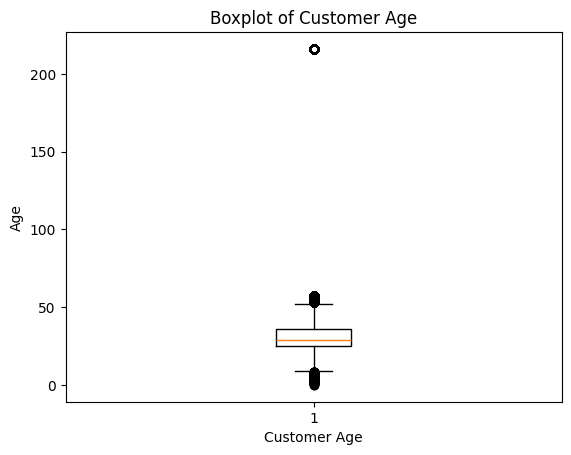

In [8]:
# calculate customer age based on the data time
df['CustomerAge'] = (df['TransactionDate'].dt.year - df['CustomerDOB'].dt.year)
df['CustomerAge'].value_counts()

# Apply absolute value to all values in 'CustomerAge' column
df['CustomerAge'] = df['CustomerAge'].abs()

import matplotlib.pyplot as plt

plt.boxplot(df['CustomerAge'])
plt.xlabel('Customer Age')
plt.ylabel('Age')
plt.title('Boxplot of Customer Age')
plt.show()



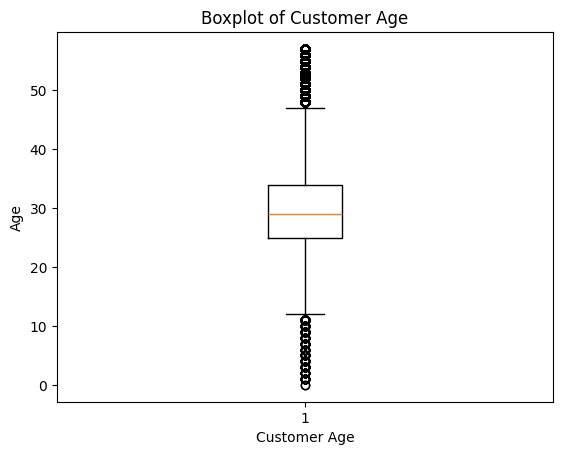

In [9]:
# Drop rows where age is above 100
df = df.drop(df[df['CustomerAge'] > 100].index)

import matplotlib.pyplot as plt

plt.boxplot(df['CustomerAge'])
plt.xlabel('Customer Age')
plt.ylabel('Age')
plt.title('Boxplot of Customer Age')
plt.show()

# Deletes the features that we don't need
df.drop(columns=['TransactionID', 'CustomerDOB', 'TransactionTime'], axis=1, inplace=True)

In [10]:
from sklearn.preprocessing import LabelEncoder

def encode_categorical_features(df):
    """
    Encodes the categorical features 'CustGender' and 'CustLocation' using LabelEncoder.

    Parameters:
    df (pandas.DataFrame): The input DataFrame containing the categorical features.

    Returns:
    pandas.DataFrame: The DataFrame with the encoded features.
    """
    # Create an instance of LabelEncoder
    encoder = LabelEncoder()
    # Encode the "CustGender" feature
    df['CustGender_encoded'] = encoder.fit_transform(df['CustGender'])
    # Encode the "CustLocation" feature (assuming it is present in the DataFrame)

    df['CustLocation_encoded'] = encoder.fit_transform(df['CustLocation'])

    return df

df = encode_categorical_features(df)
df.drop (columns=['CustGender' , 'CustLocation'] , axis=1 , inplace = True)
df

,CustomerID,CustAccountBalance,TransactionDate,TransactionAmount (INR),CustomerAge,CustGender_encoded,CustLocation_encoded
0,C5841053,17819.05,2016-02-08,25.0,22,0,3117
1,C2142763,2270.69,2016-02-08,27999.0,41,1,3174
2,C4417068,17874.44,2016-02-08,459.0,20,0,4625
3,C5342380,866503.21,2016-02-08,2060.0,57,0,4625
4,C9031234,6714.43,2016-02-08,1762.5,28,0,4965
...,...,...,...,...,...,...,...
1048562,C8020229,7635.19,2016-09-18,799.0,26,1,5066
1048563,C6459278,27311.42,2016-09-18,460.0,24,1,4943
1048564,C6412354,221757.06,2016-09-18,770.0,27,1,2954
1048565,C6420483,10117.87,2016-09-18,1000.0,38,1,7979


En la función `encode_categorical_features`, se utiliza la clase `LabelEncoder` del módulo `sklearn.preprocessing` para codificar las características categóricas "CustGender" y "CustLocation" en el DataFrame de entrada.

Primero, se crea una instancia del `LabelEncoder` utilizando la siguiente línea de código: $$ encoder = LabelEncoder() $$





Luego, se aplica la codificación a la característica "CustGender" utilizando el método `fit_transform` del `encoder`: $$ df['CustGender_encoded'] = encoder.fit_transform(df['CustGender']) $$





Este método ajusta el `encoder` a los valores únicos presentes en la columna "CustGender" del DataFrame y luego transforma esos valores en números enteros codificados. Los valores codificados se asignan a una nueva columna llamada "CustGender_encoded" en el DataFrame.

A continuación, se aplica la misma codificación a la característica "CustLocation" utilizando el método `fit_transform` nuevamente: $$ df['CustLocation_encoded'] = encoder.fit_transform(df['CustLocation']) $$





Al igual que antes, el `encoder` se ajusta a los valores únicos presentes en la columna "CustLocation" y los transforma en números enteros codificados. Los valores codificados se asignan a una nueva columna llamada "CustLocation_encoded" en el DataFrame.

Es importante tener en cuenta que el método `fit_transform` se utiliza por separado para cada característica categórica. Esto se debe a que el `encoder` necesita ajustarse a los valores únicos de cada característica individualmente para garantizar una codificación coherente.

Finalmente, la función devuelve el DataFrame con las características codificadas:

$$ return df $$



De esta manera, la función `encode_categorical_features` codifica las características categóricas "CustGender" y "CustLocation" utilizando `LabelEncoder` y agrega las columnas codificadas al DataFrame original.

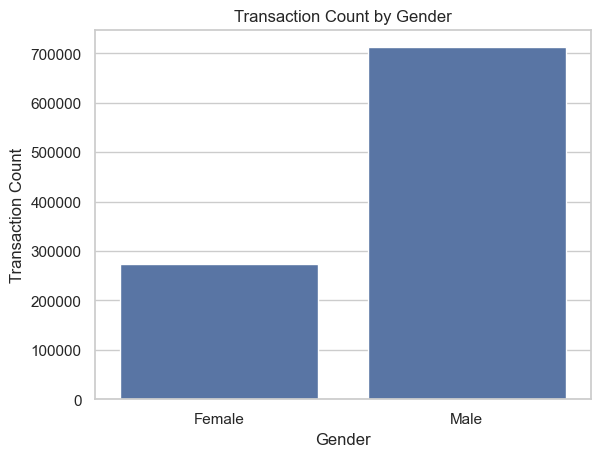

CustGender_encoded
1    712454
0    272868
Name: count, dtype: int64


In [24]:

"""
Plots the transaction count by gender.

Parameters:
df (pandas.DataFrame): The DataFrame containing the gender information.

Returns:
None
"""

gender_counts = df['CustGender_encoded'].value_counts()

# Plot transaction count by gender using seaborn
sns.countplot(data=df, x='CustGender_encoded')
plt.xlabel('Gender')
plt.ylabel('Transaction Count')
plt.xticks([0, 1], ['Female', 'Male'])
plt.title('Transaction Count by Gender')
plt.show()

print(gender_counts)


EL objetivo de este grafico es ver graficamente como se distribuyen las transacciones conforme a su genero, en este caso la mayoría son realizadas por hombres.

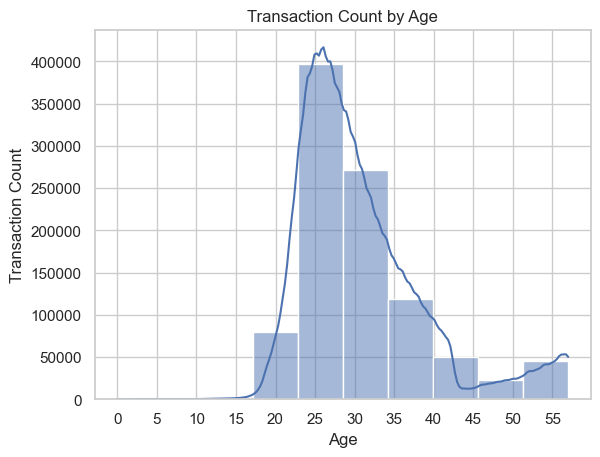

In [19]:

"""
Plots a histogram of transaction count by customer age.

Parameters:
- df: DataFrame containing the data
- x: Column name for the customer age
- bins: Number of bins for the histogram
- kde: Whether to plot a kernel density estimate
"""
sns.histplot(data=df, x='CustomerAge', bins=10, kde=True)
plt.xlabel('Age')
plt.ylabel('Transaction Count')
plt.title('Transaction Count by Age')
plt.xticks(range(0, 60, 5))
plt.show()


En esta distribucion similar a campana podemos apreciar que la media de las edades que realizan transacciones se encuentran en las edades de 23 a 35.

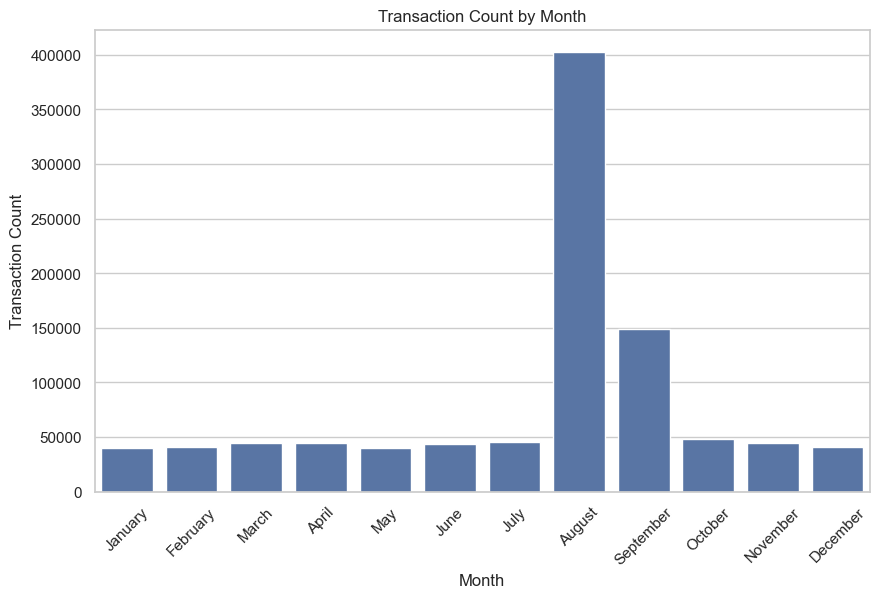

TransactionMonth
January       40232
February      41172
March         44376
April         44820
May           39914
June          43707
July          45926
August       402910
September    148810
October       48186
November      44769
December      40500
Name: count, dtype: int64


In [17]:

# Extract month from TransactionDate
df['TransactionMonth'] = df['TransactionDate'].dt.month

# Count transactions by month
transaction_counts = df['TransactionMonth'].value_counts().sort_index()

# Map month numbers to month names
transaction_counts.index = transaction_counts.index.map(lambda x: calendar.month_name[x])

# Set the style of the plot
sns.set(style="whitegrid")

# Plot transaction count by month using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=transaction_counts.index, y=transaction_counts.values)
plt.xlabel('Month')
plt.ylabel('Transaction Count')
plt.title('Transaction Count by Month')
plt.xticks(rotation=45)
plt.show()

print(transaction_counts)


Nos parecio curioso que los meses con mayor movimiento de transacciones son los meses de agosto y septiembre, a lo cual encontramos estos datos en internet que podrian explicar el motivo: 

1. La mayor cantidad de transacciones se realizó en el mes de agosto. En agosto, India celebra el Día de la Independencia el 15 de agosto, que es una fiesta nacional. 
[Fiestas de India](https://directiatravel.com/viajes-india/guia/mejor-epoca-viajar/fiestas)  
2. En septiembre de 2016, se celebró el festival de Durga Puja, que es una de las festividades más importantes en varias partes de India. [DurgaPuja](https://issuu.com/indiandiplomacy/docs/india_perspectives_spanish_septembe)